In [1]:
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime
import numpy as np
import iris.coords as icoords
import iris.coord_categorisation
import iris.quickplot as qplt 
from iris.util import broadcast_to_shape
import numpy.ma as ma
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs

In [2]:
#defining function to merge cube list into single large cube
def merge_cubes(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    n=1
    for cube in cubes:
        ensemble_coord = icoords.AuxCoord(n, standard_name='realization')
        new_cube = cube.copy()
        new_cube.add_aux_coord(ensemble_coord)
        big_cube.append(new_cube)
        n+=1
    
    return big_cube.merge_cube()

In [3]:
#defining function to reset cube time
#important for merging Jan/July cubes
def time_reset(cubes): 
    
    time_coord = cubes[0].coord('time')
    n=1
    for cube in cubes:
        cube.remove_coord('time')
        cube.add_dim_coord(time_coord,0)
        cube.remove_coord('forecast_reference_time')
        cube.remove_coord('forecast_period')
        n+=1
    
    return 

In [4]:
#setting file in path and ensemble codes by enso initial condition
dir_in_coupled = '/shared/netscratch/lrm49/Laura/'
control = ['u-bu651','u-bv666','u-bv668','u-bv669','u-bv670','u-bv674','u-bv676','u-bv677','u-bv678']
july_el = ['u-bw764'] 
july_la = ['u-bw758', 'u-bw761', 'u-bw762', 'u-bw766'] 
july_ne = ['u-bv020', 'u-bw763', 'u-bw765', 'u-bw767']
jan_el = ['u-ca322', 'u-ca325', 'u-ca331'] 
jan_la = ['u-ca323', 'u-ca324', 'u-ca326', 'u-ca328'] 
jan_ne = ['u-ca327', 'u-ca330']

In [5]:
#constraining to tropical latitudes, all longitudes
lat_constraint = iris.Constraint(latitude=lambda v: -35 <= v <= 35)

#x_wind = E-W component
#y_wind = N-S component

#El Nino Initial conditions
x_wind_cubes_el = iris.cube.CubeList()
y_wind_cubes_el = iris.cube.CubeList()

for job_id in july_el:

    wind_infile = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_el.append(x_wind_raw)
    y_wind_cubes_el.append(y_wind_raw)
    
for job_id in jan_el:

    wind_infile = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_el.append(x_wind_raw)
    y_wind_cubes_el.append(y_wind_raw)
    
    
    
#La Nina and Neutral Initial conditions
x_wind_cubes_la = iris.cube.CubeList()
y_wind_cubes_la = iris.cube.CubeList()
    
for job_id in july_la:

    wind_infile = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_la.append(x_wind_raw)
    y_wind_cubes_la.append(y_wind_raw)
    
for job_id in jan_la:

    wind_infile = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_la.append(x_wind_raw)
    y_wind_cubes_la.append(y_wind_raw)
    
for job_id in july_ne:

    wind_infile = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_la.append(x_wind_raw)
    y_wind_cubes_la.append(y_wind_raw)
    
for job_id in jan_ne:

    wind_infile = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_la.append(x_wind_raw)
    y_wind_cubes_la.append(y_wind_raw)
    
    
    
#Control Initial conditions
x_wind_cubes_cntl = iris.cube.CubeList()
y_wind_cubes_cntl = iris.cube.CubeList()
    
for job_id in control:

    wind_infile = iris.load(dir_in_coupled+'Control/'+job_id+'_10m_surf_wind.nc')
    x_wind_raw = wind_infile[0].extract(lat_constraint)
    y_wind_raw = wind_infile[1].extract(lat_constraint)

    x_wind_cubes_cntl.append(x_wind_raw)
    y_wind_cubes_cntl.append(y_wind_raw)

In [6]:
#reseting time so Jan and Jult cubes can be merged

time_reset(x_wind_cubes_el)
time_reset(y_wind_cubes_el)

time_reset(x_wind_cubes_la)
time_reset(y_wind_cubes_la)

time_reset(x_wind_cubes_cntl)
time_reset(y_wind_cubes_cntl)

In [7]:
#merging cubes
x_wind_el = merge_cubes(x_wind_cubes_el)
y_wind_el = merge_cubes(y_wind_cubes_el)

x_wind_la = merge_cubes(x_wind_cubes_la)
y_wind_la = merge_cubes(y_wind_cubes_la)

x_wind_cntl = merge_cubes(x_wind_cubes_cntl)
y_wind_cntl = merge_cubes(y_wind_cubes_cntl)

In [12]:
#extracting x_wind (E-W) ensemble mean for 12 months post eruption
x_wind_el_highres = x_wind_el[0:4].collapsed('realization',iris.analysis.MEAN)#averaged across ensembles
x_wind_el_highres = x_wind_el_highres[0:12].collapsed('time',iris.analysis.MEAN)#averaged across time

x_wind_la_highres = x_wind_la[0:14].collapsed('realization',iris.analysis.MEAN)#averaged across ensembles
x_wind_la_highres = x_wind_la_highres[0:12].collapsed('time',iris.analysis.MEAN)#averaged across time


x_wind_cntl_highres = x_wind_cntl[0:9].collapsed('realization',iris.analysis.MEAN)#averaged across ensembles
x_wind_cntl_highres = x_wind_cntl_highres[0:12].collapsed('time',iris.analysis.MEAN)#averaged across time


/home/lw602/.conda/envs/py27iris/lib/python2.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'realization'.
  warnings.warn(msg.format(self.name()))


In [13]:
#reducing size of x and y wind components by taking every 8th data point
reduced_x_el = x_wind_el[:,:,0::8,0::8]
reduced_y_el = y_wind_el[:,:,0::8,0::8]

reduced_x_la = x_wind_la[:,:,0::8,0::8]
reduced_y_la = y_wind_la[:,:,0::8,0::8]

reduced_x_cntl = x_wind_cntl[:,:,0::8,0::8]
reduced_y_cntl = y_wind_cntl[:,:,0::8,0::8]

In [14]:
#extracting lat and long coordinates
xlon = reduced_x_el.coord('longitude')
ylon = reduced_y_el.coord('longitude')
xlat = reduced_x_el.coord('latitude')
ylat = reduced_y_el.coord('latitude')

In [15]:
#taking the average for the 12-months post-eruption
year1_x_el = reduced_x_el[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)
year1_y_el = reduced_y_el[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)

year1_x_la = reduced_x_la[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)
year1_y_la = reduced_y_la[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)

year1_x_cntl = reduced_x_cntl[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)
year1_y_cntl = reduced_y_cntl[:,0:12,:,:].collapsed('time',iris.analysis.MEAN)

In [16]:
#averaging across ensembles
avg_el_x = year1_x_el.collapsed('realization',iris.analysis.MEAN)
avg_el_y = year1_y_el.collapsed('realization',iris.analysis.MEAN)

avg_la_x = year1_x_la.collapsed('realization',iris.analysis.MEAN)
avg_la_y = year1_y_la.collapsed('realization',iris.analysis.MEAN)

avg_cntl_x = year1_x_cntl.collapsed('realization',iris.analysis.MEAN)
avg_cntl_y = year1_y_cntl.collapsed('realization',iris.analysis.MEAN)

In [17]:
#defining x and y
x = xlon.points
y = xlat.points


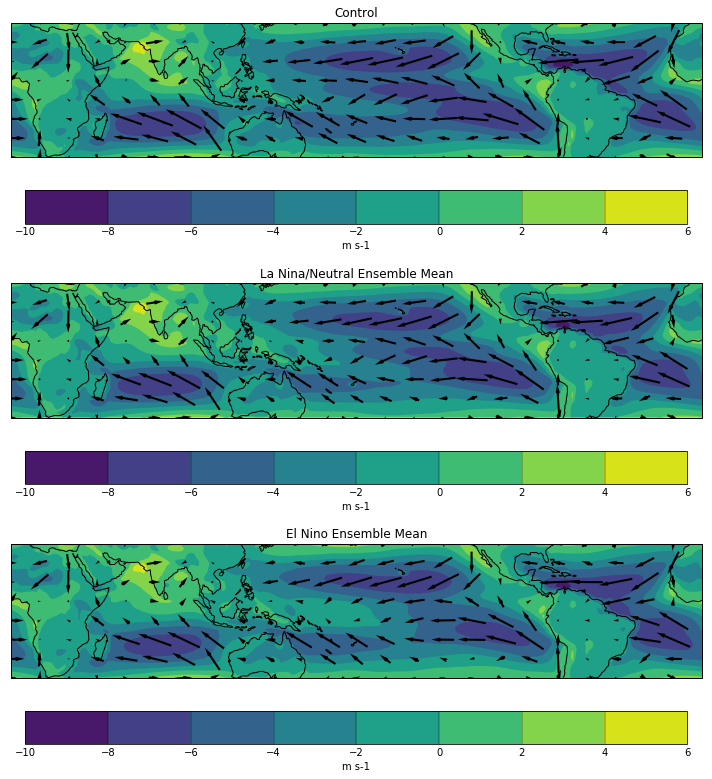

In [18]:
### Plotting Wind Dynamics ###

projection=ccrs.PlateCarree(central_longitude=180.0)#setting projection, 180 centers plot on Pacific
plt.figure(figsize=(10,11))
transform = xlon.coord_system.as_cartopy_projection()

##Control##

plt.subplot(3,1,1, projection=projection)

u = avg_cntl_x.data
v = avg_cntl_y.data

qplt.contourf(x_wind_cntl_highres) #contouring E-W wind speed
plt.gca().coastlines()
plt.title('Control')
plt.quiver(x, y, u, v, pivot='middle', transform=transform, scale_units='x', scale=0.4, headwidth = 2, headlength = 4, width = 0.003)
#plotting wind direction arrows. Size = wind speed

##La Nina/Neutral##
plt.subplot(3,1,2, projection=projection)

u = avg_la_x.data
v = avg_la_y.data

qplt.contourf(x_wind_la_highres)#contouring E-W wind speed
plt.gca().coastlines()
plt.title('La Nina/Neutral Ensemble Mean')
plt.quiver(x, y, u, v, pivot='middle', transform=transform, scale_units='x', scale=0.4, headwidth = 2, headlength = 4, width = 0.003)
#plotting wind direction arrows. Size = wind speed

##El Nino##
plt.subplot(3,1,3, projection=projection)

u = avg_el_x.data
v = avg_el_y.data

qplt.contourf(x_wind_el_highres)#contouring E-W wind speed
plt.gca().coastlines()
plt.title('El Nino Ensemble Mean')
plt.quiver(x, y, u, v, pivot='middle', transform=transform, scale_units='x', scale=0.4, headwidth = 2, headlength = 4, width = 0.003)
#plotting wind direction arrows. Size = wind speed

plt.tight_layout()

plt.savefig('Wind_Comparision_ENSO.pdf')